In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv('../data/final/clean_trial4.csv')

In [3]:
data.head(1)

,logkpl,Compound,SMILES,Texpi,ALogp2,nAcid,nAromBond,ATSc2,ATSc3,ATSc4,...,nRings9,TopoPSA,VAdjMat,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,XLogP,Zagreb
0,-3.55,Urea,C(=O)(N)N,312,1.085972,0,0,-0.116019,0.023614,0.0,...,0,69.11,2.584963,1.683013,6.732051,2.244017,4.488034,9.0,-1.686,12.0


In [4]:
# we exculude logkpl, compound, smiles
features_used = data.columns[3:]
features_used

Index(['Texpi', 'ALogp2', 'nAcid', 'nAromBond', 'ATSc2', 'ATSc3', 'ATSc4',
       'ATSc5', 'ATSm1', 'BCUTw-1l',
       ...
       'nRings9', 'TopoPSA', 'VAdjMat', 'WTPT-2', 'WTPT-3', 'WTPT-4', 'WTPT-5',
       'WPATH', 'XLogP', 'Zagreb'],
      dtype='object', length=146)

In [5]:
validate_df = pd.read_csv("../validation/huskinDB.csv")

In [6]:
ready_df = validate_df.iloc[:, 7:].copy()
ready_df = ready_df[features_used].copy()
ready_df

,Texpi,ALogp2,nAcid,nAromBond,ATSc2,ATSc3,ATSc4,ATSc5,ATSm1,BCUTw-1l,...,nRings9,TopoPSA,VAdjMat,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,XLogP,Zagreb
0,305,5.739858,0,0,-0.369067,0.023043,-0.079934,0.071173,21.952286,11.772348,...,0,128.61,5.169925,1.989290,22.097869,13.159296,8.938573,496,-2.193,88
1,305,5.787874,0,0,-0.442031,0.053387,-0.148914,0.199813,25.726755,11.772444,...,0,131.69,5.392317,1.984280,25.066469,15.587089,9.479379,831,-2.122,102
2,305,0.137122,0,0,-0.443286,0.059314,-0.153855,0.202112,29.726755,11.772443,...,0,131.69,5.643856,1.986664,25.313855,15.722078,9.591777,1517,-0.162,118
3,310,13.363411,1,12,-0.111837,-0.014385,0.021546,0.016991,21.050982,11.675174,...,0,37.30,5.247928,1.999585,7.333606,4.766062,0.000000,626,3.764,90
4,310,3.066701,0,12,-0.313785,-0.233705,0.162347,-0.154807,35.923327,11.675174,...,0,116.45,5.954196,2.008461,21.169807,18.599142,0.000000,2534,2.458,150
5,310,3.066701,0,12,-0.313785,-0.233705,0.162347,-0.154807,35.923327,11.675174,...,0,116.45,5.954196,2.008461,21.169807,18.599142,0.000000,2534,2.458,150
6,310,12.831440,1,6,-0.091023,-0.007140,-0.004794,-0.002437,16.548938,11.687399,...,0,37.30,4.906891,1.938886,4.764811,4.764811,0.000000,404,3.641,70
7,310,2.814677,0,6,-0.292959,-0.226282,0.137655,-0.165921,31.421283,11.687401,...,0,116.45,5.754888,1.974457,18.597998,18.597998,0.000000,1922,2.335,130
8,310,2.814677,0,6,-0.292959,-0.226282,0.137655,-0.165921,31.421283,11.687401,...,0,116.45,5.754888,1.974457,18.597998,18.597998,0.000000,1922,2.335,130
9,310,11.128229,1,12,-0.131348,-0.026306,-0.003247,0.038815,21.323407,11.683719,...,0,54.37,5.321928,1.997704,7.346463,7.346463,0.000000,724,3.217,94


In [31]:
# load the model from disk
loaded_model = pickle.load(open("../models/RandomForest_model.sav", 'rb'))
# result = loaded_model.predict(ready_df)
# validate_df['randomforest'] = result
# print(result)

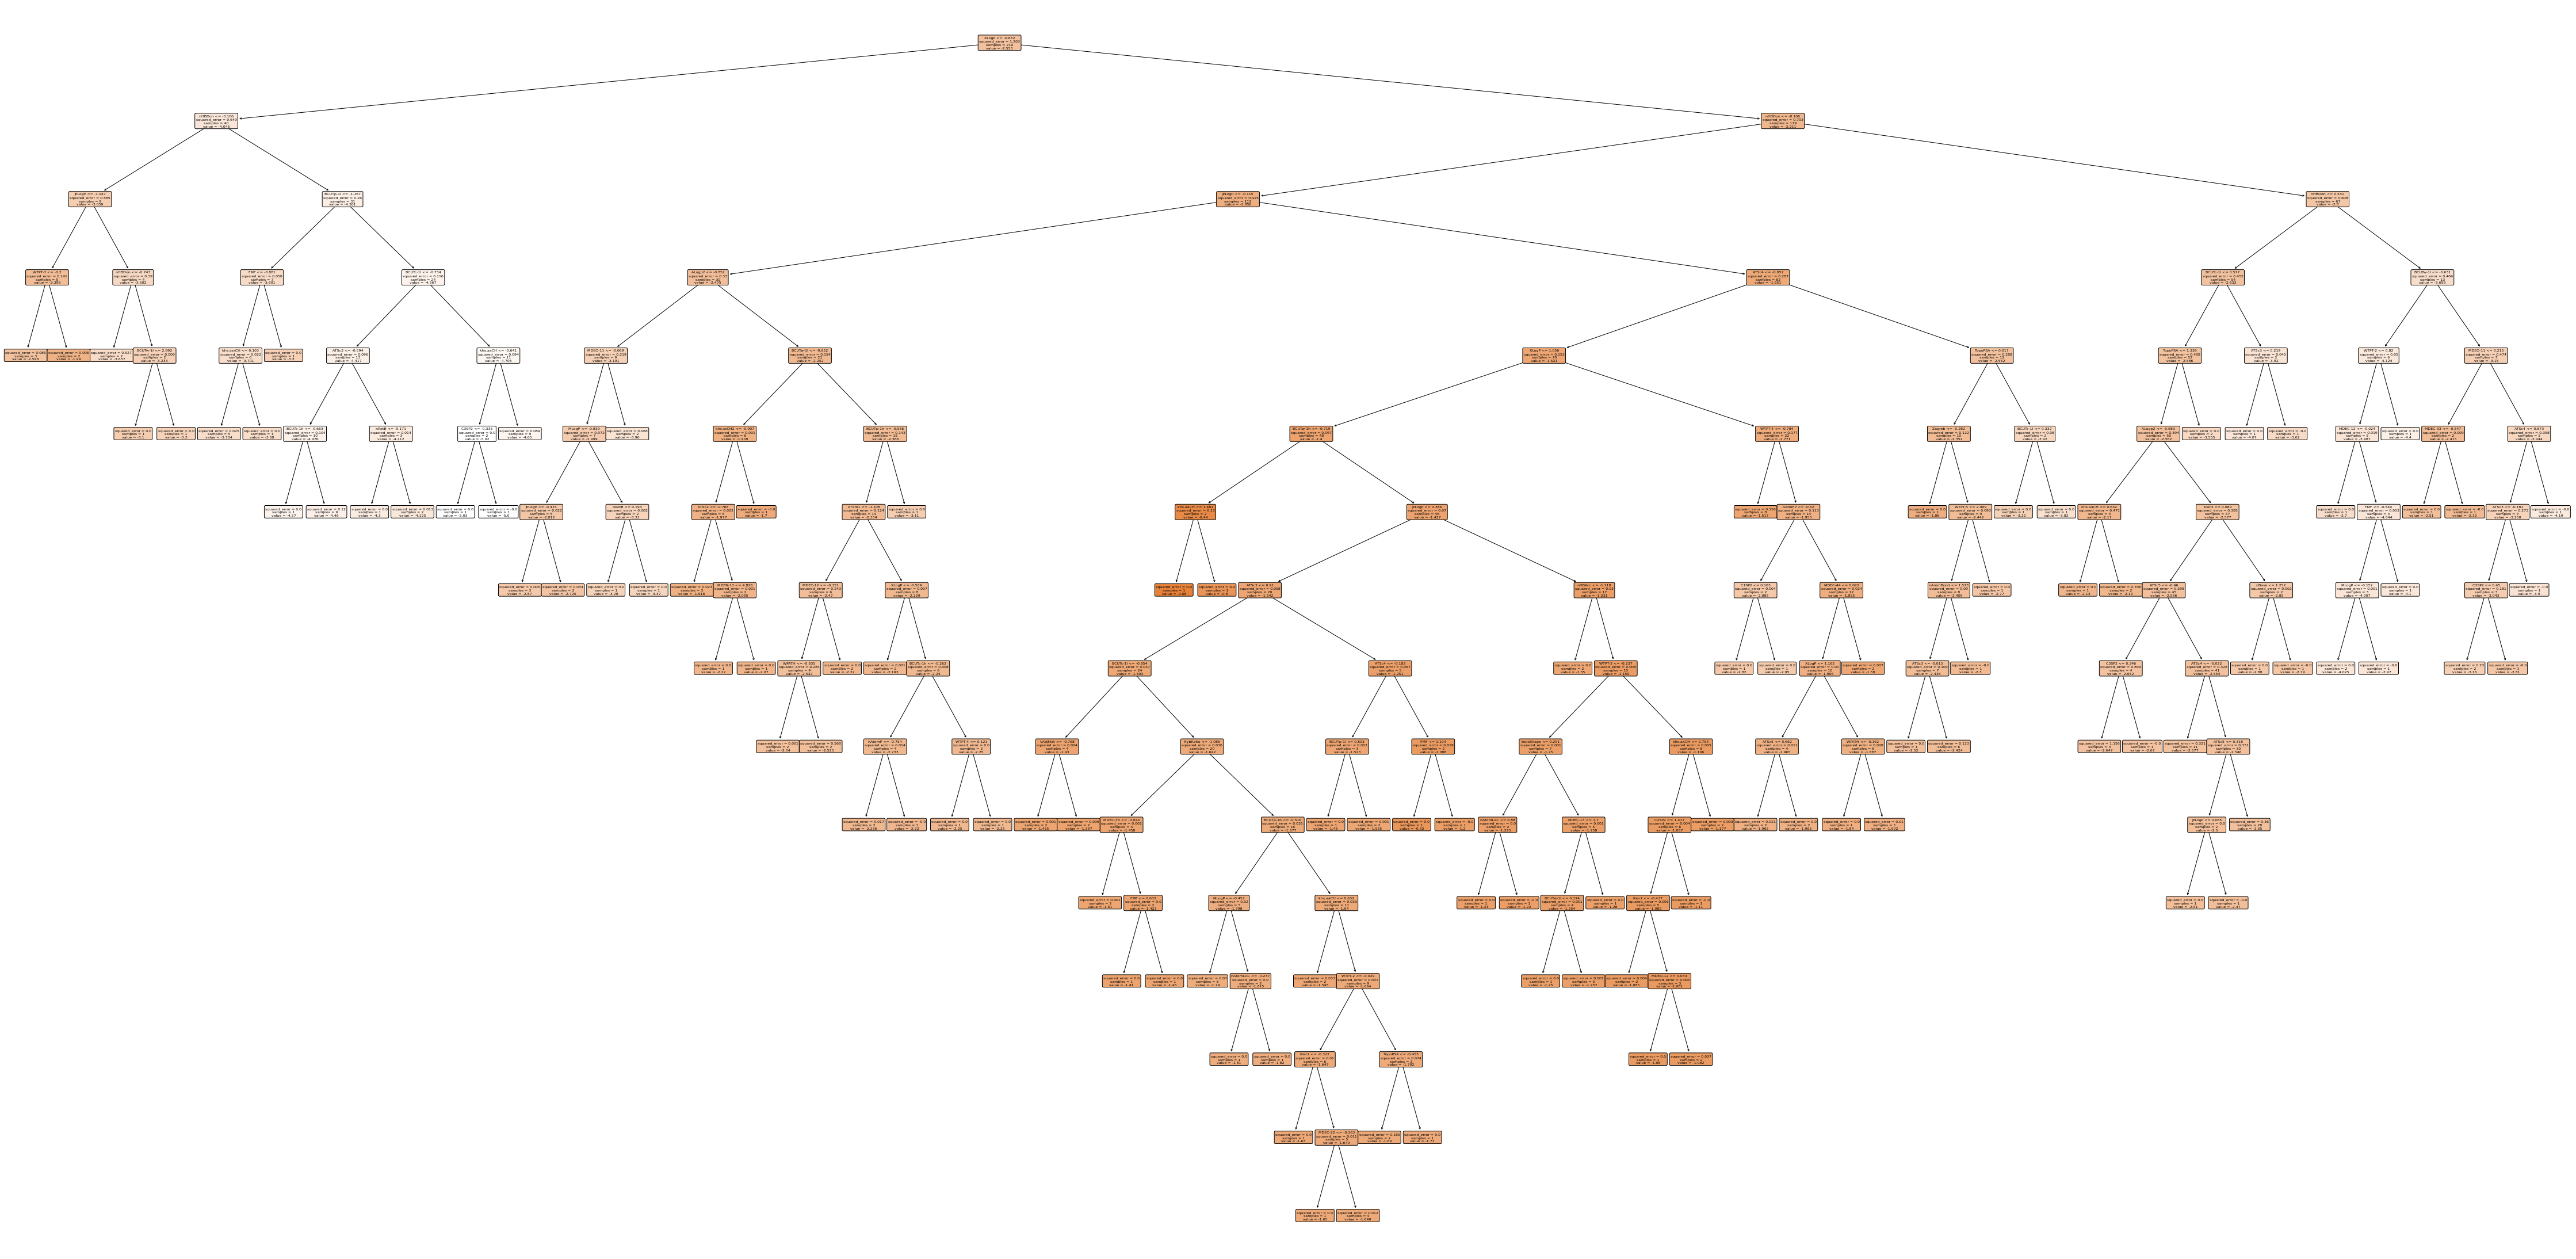

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(loaded_model.estimators_[0], feature_names = ready_df.columns, filled=True, rounded=True, max_depth=None);


# plt.show();
plt.savefig('../results/images/full_randomforest.png')

In [55]:
loaded_model = pickle.load(open("../models/CatBoostRegressor_model.sav", 'rb'))
result = loaded_model.predict(ready_df)
validate_df['catboost'] = result
print(result)

In [10]:
loaded_model = pickle.load(open("../models/LGBMRegressor_model.sav", 'rb'))
result = loaded_model.predict(ready_df)
validate_df['lightgbm'] = result
print(result)

[-3.9354203  -3.94420609 -3.23194026 -2.8010344  -2.59146297 -2.59146297
 -2.71605931 -2.59146297 -2.59146297 -2.78718827 -2.59146297 -2.59146297
 -2.8010344  -2.51828039 -2.51828039]


In [13]:
from tensorflow.keras.models import model_from_json

In [14]:
ready_df.shape

(15, 146)

In [18]:
json_file = open('../models/ANN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("../models/ANN_model.h5")
#loaded_model.predict(X_test[0].reshape((1, 512, 512, 1))).argmax(axis=1)
print("Loaded model from disk")

Loaded model from disk


In [23]:
loaded_model.predict(ready_df)

1/1 [==============================] - 0s 12ms/step


array([[ 72.90271],
       [163.574  ],
       [360.28256],
       [162.1364 ],
       [656.771  ],
       [656.771  ],
       [105.41537],
       [488.0215 ],
       [488.0215 ],
       [181.74654],
       [710.61597],
       [710.61597],
       [133.18669],
       [583.39044],
       [583.39044]], dtype=float32)

In [24]:
validate_df['mean'] = (validate_df['randomforest'] + validate_df['catboost'] + validate_df['lightgbm']) / 3

In [26]:
validate_df['diff'] = abs(validate_df['logkp (cm/h)'] - validate_df['mean'])

In [30]:
validate_df[['Compound name', 'Smiles', 'logkp (cm/h)', "ionized",	"Texpi", "randomforest","catboost","lightgbm", "mean", "diff"]].to_excel("validation_results.xlsx", index=False)